# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(browser.html, 'html.parser')

In [6]:
# Extract all rows of data
table_rows = soup.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in table_rows:
    columns = row.find_all('td')

    row_data = [col.get_text(strip=True) for col in columns]

    data.append(row_data)

In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

mars_df = pd.DataFrame(data, columns=column_names)

In [15]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [16]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [24]:
# Change data types for data analysis
mars_df['id'] = pd.to_numeric(mars_df['id'], errors='coerce')  
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'], errors='coerce') 
mars_df['sol'] = pd.to_numeric(mars_df['sol'], errors='coerce')  
mars_df['ls'] = pd.to_numeric(mars_df['ls'], errors='coerce')  
mars_df['month'] = pd.to_numeric(mars_df['month'], errors='coerce')  
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'], errors='coerce')  
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'], errors='coerce')

In [25]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                         float64
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [28]:
# 1. How many months are there on Mars?
num_months = mars_df['month'].nunique()
num_months

12

In [29]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_df['sol'].nunique()
num_sols

1867

In [32]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64

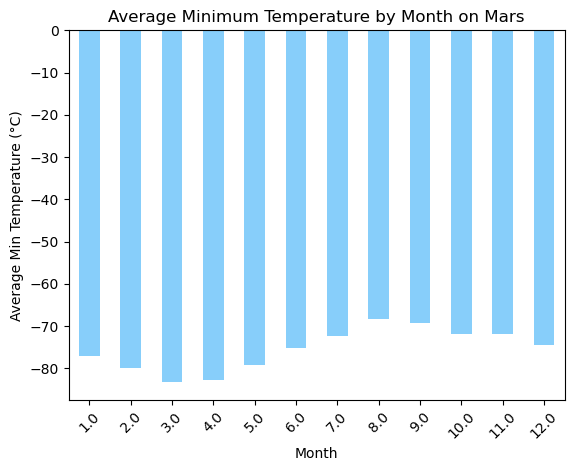

In [37]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', color='lightskyblue')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

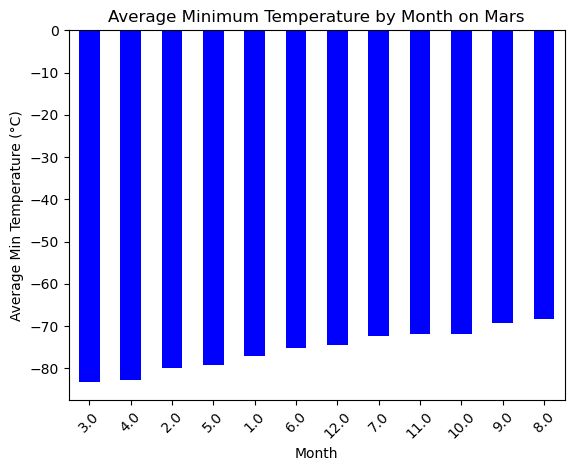

In [40]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_sorted = avg_min_temp.sort_values()
avg_min_temp_sorted.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

In [41]:
# 4. What is the average pressure by month?
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure

month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64

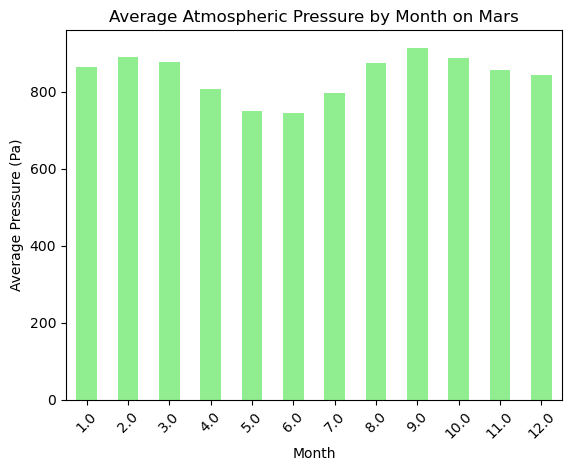

In [ ]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', color='lightgreen')

plt.title('Average Atmospheric Pressure by Month on Mars')

plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=45)
plt.show()

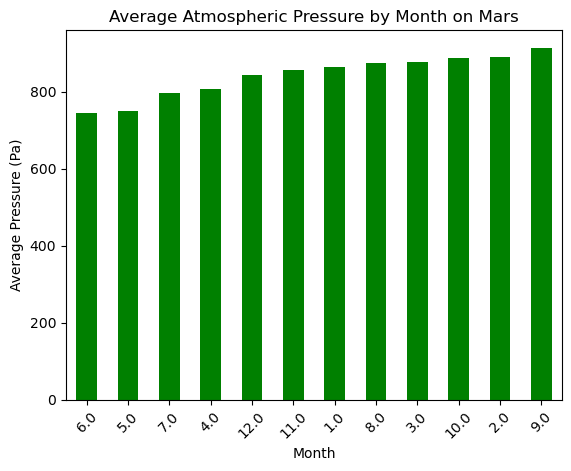

In [ ]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_sorted = avg_pressure.sort_values()
avg_pressure_sorted.plot(kind='bar', color='green')

plt.title('Average Atmospheric Pressure by Month on Mars')

plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=45)
plt.show()

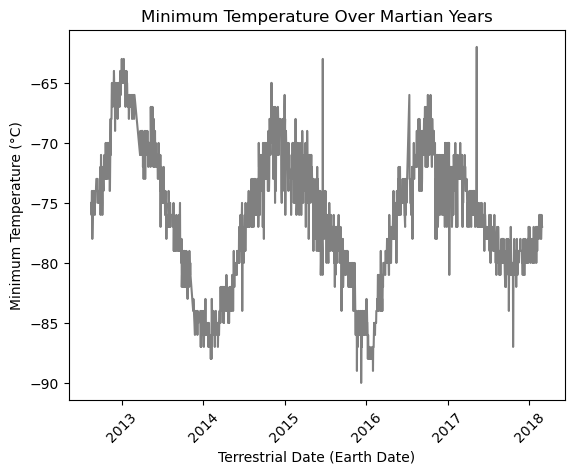

In [ ]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], color='grey')

plt.title('Minimum Temperature Over Martian Years')
plt.xlabel('Terrestrial Date (Earth Date)')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

#### Minimum Temperature

The average temperature on Mars is significantly lower than that of Earth, with the highest avg being -68 C during month 8 and lowest avg -83 C during month 3. There is a seasonal trend that is rather strong showing the difference in temperature per Martian months.

#### Atmospheric Pressure

The martian atmospheric Pressure during the 6th month is the lowest at 745.054422 Pa, while the highest is during the 9th month at 913.305970 Pa. The highs take place at month 2 and month 9 with a dip that bottoms out at month 6. Between months 9 to month 2 there is another dip but not nearly so low as in month 6.

#### Year Length

Looking at the Minimum Temperature Over Martian Years graph, the trend follows a familiar wave that we would see with seasonal weather. There are certain points in time (such as 2013, 2015, and 2017) that the temerapture is generally warmer in comparison to the other years (2014 and 2016) where the temperatures reach their lowest. Mars has a significantly longer 'year' than earth, if judging by its 'seasons' is anything to go by, the season/weather changes going from the high to low within roughly the amount of time as an earth year. 


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [52]:
# Write the data to a CSV
mars_df.to_csv('mars_temperature_data.csv')

In [53]:
browser.quit()